In [6]:
%load_ext autoreload


In [7]:
%autoreload 2


# EDA on customer loans


## Code

Importing modules

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy import stats
from scipy.stats import yeojohnson, zscore
import matplotlib.pyplot as plt
import plotly.express as px

Importing classes

In [12]:
from DataFrameTransform import DataFrameTransformModified as DataFrameTransform
from DataInfo import DataFrameInfo
from DataTransform import DataTransformModified as DataTransform
from Plotter import Plotter, Charts
from data_viewer import Plotter as Plots


Importing data

In [10]:
df = pd.read_csv('loan_payments.csv')
df = pd.DataFrame(df)

First I need to convert all the columns to the right data type

In [16]:
columns_to_bool = ['payment_plan']
bool_dict = {columns_to_bool[0]: ('y', 'n')}
columns_to_int = ['term', 'employment_length']
columns_to_cat = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type', 'policy_code']
columns_to_date = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'last_credit_pull_date']
date_format = '%b-%Y'

df_transform = DataTransform()
df_transform.convert_to_bool(df, bool_dict)
df_transform.convert_to_cat(df, columns_to_cat)
df_transform.convert_to_int(df, columns_to_int)
df_transform.convert_to_date(df, columns_to_date, date_format)


,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.000000,0.00,0.00,2022-01-01,248.82,Feb-2022,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.000000,0.00,0.00,2022-01-01,407.52,Feb-2022,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,NaN,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,NaN,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.000000,0.00,0.00,2022-01-01,456.54,Feb-2022,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,1 year,MORTGAGE,250000.0,Not Verified,2013-07-01,Fully Paid,n,other,10.00,2,2003-04-01,0,5.0,NaN,5,7,0.00,0.00,5724.82,2032.29,5000.00,724.82,0.000000,0.00,0.00,2016-07-01,160.61,NaN,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,< 1 year,RENT,15000.0,Not Verified,2013-10-01,Fully Paid,n,other,24.40,0,1999-01-01,3,0.0,0.0,6,6,0.00,0.00,5931.25,2787.47,5000.00,826.31,104.942381,0.00,0.00,2016-10-01,490.01,NaN,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,10+ years,MORTGAGE,300000.0,Not Verified,2013-08-01,Does not meet the credit policy. Status:Fully ...,n,debt_consolidation,1.00,0,1984-02-01,0,NaN,NaN,8,18,0.00,0.00,3915.37,2489.01,3500.00,415.37,0.000000,0.00,0.00,2016-09-01,110.58,Sep-2016,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,4 years,RENT,200000.0,Not Verified,2013-08-01,Fully Paid,n,house,0.28,0,1995-03-01,0,0.0,0.0,2,2,0.00,0.00,5174.18,232.84,5000.00,174.18,0.000000,0.00,0.00,2014-03-01,0.00,NaN,2013-05-01,NaN,NaN,1,INDIVIDUAL


Checking null percent of each column

In [23]:
df_plot = Plotter()
high_nulls = df_plot.percent_of_nulls(df)[0]
imputer_nulls = df_plot.percent_of_nulls(df,50)[1]
print(imputer_nulls)
df_plot =df.drop(high_nulls, axis=1)




ready for action
funded_amount has 5.54 null percentage
int_rate has 9.53 null percentage
collections_12_mths_ex_med has 0.09 null percentage
the columns with over 50% nulls are ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']
funded_amount has 5.54 null percentage
int_rate has 9.53 null percentage
collections_12_mths_ex_med has 0.09 null percentage
the columns with over 50% nulls are ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']
['funded_amount', 'int_rate', 'collections_12_mths_ex_med']


Dropped the columns with over 50% nulls

Now time to impute the nulls

In [25]:

df_imputer = DataFrameTransform()
medians_means = df_imputer.columns_to_mean_from_nulls(df, imputer_nulls)
median_imputees = medians_means[1]
mean_imputees = medians_means[0]
df = df_imputer.impute_missing_values(df, median_imputees, mean_imputees)

IndexError: list index out of range

use Plotter to check that it has worked

In [27]:
print(df.head())
df_plot = Plotter()
df_plot.percent_of_nulls(df)
df['term']

   Unnamed: 0        id  ...  policy_code  application_type
0           0  38676116  ...            1        INDIVIDUAL
1           1  38656203  ...            1        INDIVIDUAL
2           2  38656154  ...            1        INDIVIDUAL
3           3  38656128  ...            1        INDIVIDUAL
4           4  38656121  ...            1        INDIVIDUAL

[5 rows x 44 columns]
ready for action
funded_amount has 5.54 null percentage
int_rate has 9.53 null percentage
collections_12_mths_ex_med has 0.09 null percentage
the columns with over 50% nulls are ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog']


0        36 months
1        36 months
2        36 months
3        36 months
4        36 months
           ...    
54226    36 months
54227    36 months
54228    36 months
54229    36 months
54230    36 months
Name: term, Length: 54231, dtype: object

## Skew and Outliers

Now it's time to start viewing the data; firstly skew

/Users/jamespreston/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


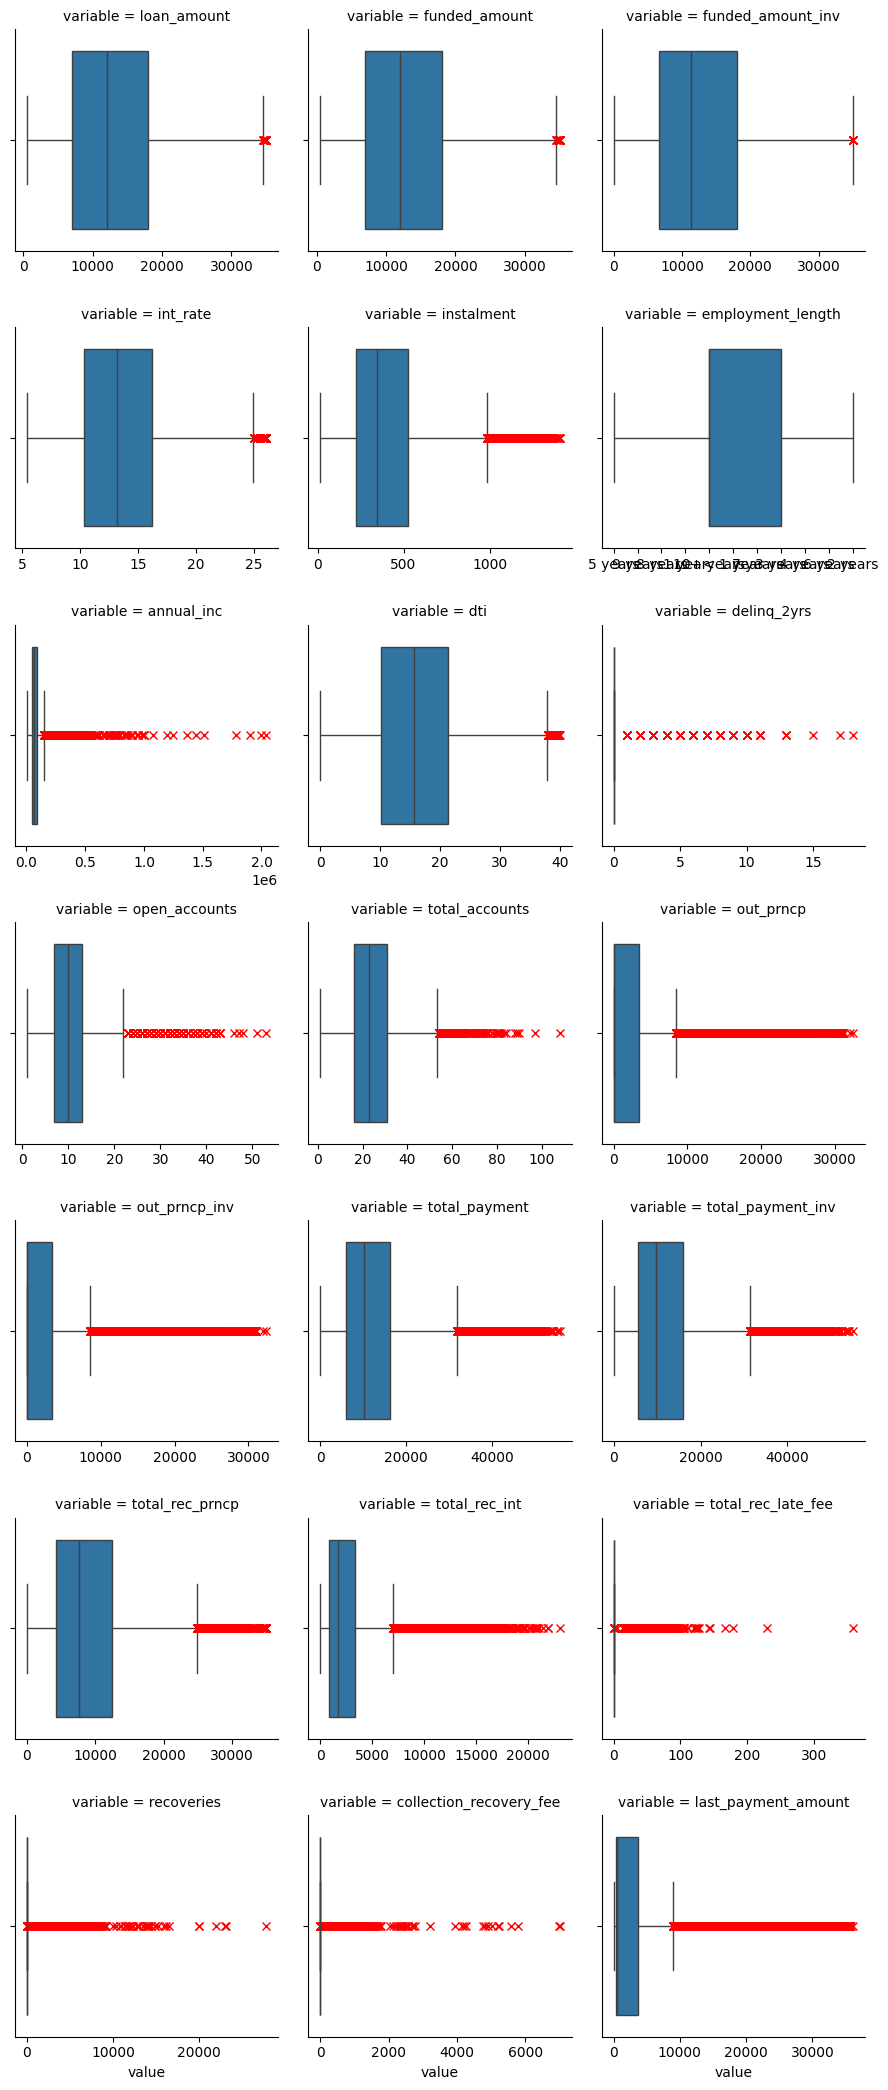

In [28]:
columns_that_should_be_skew_viewable = ['loan_amount','funded_amount','funded_amount_inv','int_rate','instalment','employment_length','annual_inc','dti','delinq_2yrs','mths_since_last_delinq','mths_since_last_record','open_accounts','total_accounts','out_prncp','out_prncp_inv','total_payment','total_payment_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_payment_amount','mths_since_last_major_derog']
for column in high_nulls:
    try:
        columns_that_should_be_skew_viewable.remove(column)
    except:
        pass
df_plot = Plots()
df_plot.facet_grid_box_plot(df, columns_that_should_be_skew_viewable)
#columns_with_skew = df_plot.skew_column_maker(df, columns_that_should_be_skew_viewable)
#df_transform = DataFrameTransform(df)
#list_of_imputations = df_transform.method_for_correction(columns_with_skew)

In [ ]:
print(list_of_imputations)

[[], ['annual_inc'], ['delinq_2yrs', 'open_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount']]


In [ ]:
df_transform.log_correcting(list_of_imputations[0])
df_transform.boxcox_correcting(list_of_imputations[1])
df_transform.yeo_correcting(list_of_imputations[2])
df = df_transform.df
df_transform.df['term']

0        36.0
1        36.0
2        36.0
3        36.0
4        36.0
         ... 
54226    36.0
54227    36.0
54228    36.0
54229    36.0
54230    36.0
Name: term, Length: 54231, dtype: float64

In [ ]:
df_plot = Plotter(df)
columns_with_potential_outliers = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'employment_length', 'annual_inc', 'dti']
df_zscore = df_plot.zscore_maker()
df_transform = DataFrameTransform(df_plot.df)
df_transform.zscore_dropper(df_zscore, columns_with_potential_outliers, 3)
df_plot = Plotter(df_transform.df)
null_columns = df_plot.percent_of_nulls()



int_rate has 0.04 null percentage
annual_inc has 0.37 null percentage
dti has 0.06 null percentage
the columns with over 50% nulls are []


Now time to look for overly corelated columns

In [ ]:
df = df_transform.df
numeric_cols = df_transform.columns_with_numeric()
df_plot = Plotter(df)
df_plot.percent_of_nulls()
df_plot.correlated_vars(numeric_cols)


drop_cols = df_plot.columns_to_drop(numeric_cols)
print(drop_cols)

df_transform = DataTransform(df)
df_transform.write_to_csv('imputed_and_nulls.csv')

AttributeError: 'DataTransform' object has no attribute 'columns_with_numeric'

## Current state of loans

In [ ]:
df_info = DataFrameInfo(df)
paid_percent = df_info.column_percent('total_payment', 'funded_amount')
print(paid_percent)

0.42461357338989664


In [ ]:
df_transform = DataFrameTransform(df)
predictions_df = df_transform.predictions(6)

In [ ]:
total_collections = predictions_df['total_collections'] # Extract total collection amount from dictionary.
total_loan = predictions_df['total_loan'] # Extract total loan amount from dictionary.
total_loan_outstanding = predictions_df['total_loan_outstanding'] # Extract total loan amount outstanding from dictionary.


In [ ]:
print(f'the percent of the collections over the loans is {total_collections/total_loan*100}%')

the percent of the collections over the loans is 17.57488146994802%


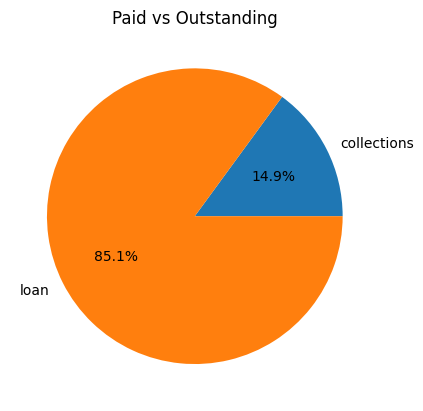

In [ ]:
charts = Charts()
charts.pie_charts(['collections', 'loan'], [total_collections, total_loan], 'Paid vs Outstanding')


In [ ]:
number_of_charge_offs = len(df[df['loan_status']=='Charged Off'])

print(f'the percent of loans that are charged off is {round(number_of_charge_offs/len(df)*100,1)}%')

total_payment_charged_off = df[df['loan_status']=='Charged Off']['total_payment'].sum() 

the percent of loans that are charged off is 10.3%


In [ ]:
charged_off_df = df[df['loan_status']=='Charged Off'].copy() 
total_loan_amount = charged_off_df['funded_amount'] + (charged_off_df['funded_amount'] * (charged_off_df['int_rate']) * 0.01) 
charged_off_df['projected_loss'] = total_loan_amount - charged_off_df['total_payment'] 
projected_loss = charged_off_df['projected_loss'].sum() 


categories = ['Total Expected Revenue', 'Total Actual Revenue', 'Total Loans Value', 'Charged Off Loan Paid Back Total', 'Projected Loss of Revenue']
total_expected_revenue = (df['loan_amount'] * (1 + (df['int_rate'] * 0.01))).sum() 
total_actual_revenue = df['total_payment'].sum()
loans_total = df['funded_amount'].sum()
data = [total_expected_revenue/1000000000, total_actual_revenue/1000000000, loans_total/1000000000, total_payment_charged_off/1000000000, projected_loss/1000000000] # Categorical variables divided by 1,000,000,000.
df_plot = Plotter(charged_off_df)
df_plot.percent_of_nulls()
df = df_plot.df



int_rate has 0.05 null percentage
annual_inc has 0.27 null percentage
dti has 0.02 null percentage
projected_loss has 0.05 null percentage
the columns with over 50% nulls are []
       Unnamed: 0        id  member_id  loan_amount  funded_amount  \
1963         1963  38351933   41135686         5000         5000.0   
1994         1994  38342053   41125800        14400        14400.0   
2013         2013  38341391   41125118        25000        25000.0   
2027         2027  38331938   41115688         8950         8950.0   
2028         2028  38331779   41115526        20000        20000.0   
...           ...       ...        ...          ...            ...   
54152       54152    127830     127824         8000         8000.0   
54156       54156    127472     127460         2125         2125.0   
54180       54180    118533     117783         2500         2500.0   
54194       54194    113179     113093         1000         1000.0   
54198       54198    111227     111223        20000 

In [ ]:
revenue_lost = charts.revenue_lost_by_month(charged_off_df) # Calculating cumulative revenue lost for each month in a list.
revenue_lost = [revenue/1000000 for revenue in revenue_lost] # Scaling the revenue values down.


the num is 212.0, 7
the num is 212.0, 56
the num is 181.0, 83
the num is 181.0, 90
the num is 59.0, 117
the num is 90.0, 138
the num is 181.0, 149
the num is 120.0, 190
the num is 151.0, 209
the num is 90.0, 314
the num is 212.0, 336
the num is 212.0, 362
the num is 181.0, 395
the num is 120.0, 431
the num is 212.0, 502
the num is 212.0, 558
the num is 120.0, 564
the num is 151.0, 577
the num is 59.0, 590
the num is 181.0, 613
the num is 59.0, 634
the num is 120.0, 708
the num is 181.0, 744
the num is 181.0, 789
the num is 212.0, 807
the num is 181.0, 824
the num is 151.0, 835
the num is 181.0, 866
the num is 181.0, 871
the num is 181.0, 874
the num is 212.0, 897
the num is 151.0, 949
the num is 120.0, 959
the num is 31.0, 967
the num is 151.0, 984
the num is 59.0, 1001
the num is 120.0, 1057
the num is 181.0, 1083
the num is 212.0, 1092
the num is 120.0, 1104
the num is 212.0, 1195
the num is 212.0, 1214
the num is 181.0, 1217
the num is 181.0, 1234
the num is 59.0, 1252
the num is 15

In [ ]:
print(revenue_lost)

[2.15275119, 4.30550238, 6.45825357, 8.61100476, 10.763755949999998, 12.916507139999998, 15.069258329999998, 17.22200952, 19.37476071, 21.527511900000004, 23.680263090000004, 25.833014280000004, 27.985765470000008, 30.138229410000008, 32.28739522000001, 34.432280590000005, 36.575939590000004, 38.719598590000004, 40.86325759, 43.00691659, 45.15057559, 47.29423459, 49.43789359, 51.58155259, 53.72521159, 55.86887059, 58.01252959000001, 60.156188590000006, 62.299847590000006, 64.44350659, 66.58716559, 68.73082459, 70.87448359, 73.01814259, 75.16180159000001, 77.30546059000001, 79.44911959000001, 81.59277859000001, 83.73643759000001, 85.88009659000001, 88.02375559000001, 90.16741459, 92.31107359, 94.45473259, 96.59615243, 98.72927368, 100.85805379, 102.98633605, 105.11461831000001, 107.24290057000002, 109.37118283000002, 111.49946509000003, 113.62774735000004, 115.75602961000004, 117.88431187000005, 120.01259413000005, 122.14087639000006, 124.26915865000007, 126.39744091000007, 128.52572317

In [ ]:
risky_status = ['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] 
risky_df = df[df['loan_status'].isin(risky_status)] 
current_df = df[df['loan_status'].isin(['Current','Late (31-120 days)','In Grace Period', 'Late (16-30 days)'])] 

risky_customers_sum = len(risky_df) 

percentage_of_risky_loans = charts.calc_percent(risky_customers_sum, len(df)) 
percentage_of_current_risky_loans = charts.calc_percent(risky_customers_sum, len(current_df)) 

print(f"There are {risky_customers_sum} 'Risky' loans.")


ZeroDivisionError: division by zero

In [ ]:
default_df = df[df['loan_status']=='Default']

default_projected_revenue_lost = charts.revenue_lost_by_month(default_df) # Calculating cumulative revenue lost for each month in a list.
print(default_projected_revenue_lost)
default_total_revenue_lost = default_projected_revenue_lost[-1] # Total revenue lost from defaulted loans

# Setting up parameters for visualisation:
variables_3 = [total_expected_revenue-default_total_revenue_lost, default_total_revenue_lost]
title_3 = 'Projected Revenue Lost from Default Loans'


nan


TypeError: 'float' object cannot be interpreted as an integer